In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/Evaluation_Week1/Automobile_insurance_fraud.csv", sep=' *, *', na_values='?')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,NaN,0,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,NaN,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,NaN,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [25]:
df.info()
#There were no null values intially, then catogorical variables are gone through there are some ? so reloaded with indicating Nan values as ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [26]:
#Droping Columns which do not have any information
df=df.drop(columns=['_c39'],axis=1)

In [27]:
categorial_features = df.select_dtypes(include=[np.object])
#frequency of categories
for col in categorial_features:
    print(df[col].value_counts())
#Need a change in date format, can be seperating them date, Months and years
# There are incident city are also unquie for all the customers, So can be droped

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
28-01-2010    2
29-09-1999    2
25-09-2001    2
04-05-2000    2
03-02-1997    2
07-04-1999    2
25-12-2013    2
28-12-1991    2
30-08-1993    2
21-09-2005    2
20-07-1991    2
29-01-1998    2
24-06-1990    2
22-08-1991    2
09-07-2002    2
07-12-1999    2
07-07-1996    2
16-07-2002    2
11-11-1998    2
28-12-2002    2
03-01-2004    2
05-07-2014    2
15-05-1997    2
14-04-1992    2
09-03-2003    2
07-11-1997    2
05-01-1992    2
15-11-1997    2
14-07-1997    2
06-05-2007    2
21-09-1996    2
16-05-2008    2
21-12-2002    2
11-03-2010    2
19-09-1995    2
08-11-2009    2
07-12-1995    2
25-05-1990    2
20-09-1990    2
04-06-2000    2
27-07-2014    2
07-04-1994    1
29-02-1992    1
09-08-2002    1
16-09-1990    1
02-12-2012    1
22-03-2000    1
09-10-1995    1
11-12-1998    1
13-04-2002    1
17-06-2008    1
28-07-2002    1
21-12-1999    1
27-05-2002    1
28-03-1990    1
05-12-2014    1
21-11-2006    1
24-06-19

In [28]:
#Droping Columns which do not have any significant information, just unique variables in all the customers
df=df.drop(columns=['incident_location'],axis=1)

In [29]:
categorial_features = df.select_dtypes(include=[np.object])
categorial_features.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [30]:
#Let seperate the date in months and years and drop the days
import datetime
#Column 1
df['policy_bind_date']= pd.to_datetime(df['policy_bind_date'], format="%d-%m-%Y")

df["blind_day"] = df['policy_bind_date'].map(lambda x: x.day)
df["blind_month"] = df['policy_bind_date'].map(lambda x: x.month)
df["blind_year"] = df['policy_bind_date'].map(lambda x: x.year)
df.drop(['policy_bind_date'],inplace=True, axis=1)
df.drop(['blind_day'],inplace=True, axis=1)

#Column 2
df['incident_date']= pd.to_datetime(df['incident_date'], format="%d-%m-%Y")
df["inc_day"] = df['incident_date'].map(lambda x: x.day)
df["inc_month"] = df['incident_date'].map(lambda x: x.month)
df["inc_year"] = df['incident_date'].map(lambda x: x.year)
df.drop(['incident_date'],inplace=True, axis=1)
df.drop(['inc_day'],inplace=True, axis=1)

In [31]:
categorial_features = df.select_dtypes(include=[np.object])
#frequency of categories
for col in categorial_features:
    print(df[col].value_counts())
    
#the Label looks imbalance

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving      

In [32]:
#Lets go with label encoder for all these catogorical columns
#Keeping columns with missing data as such

from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

df['policy_state']=LE.fit_transform(df['policy_state'])
df['policy_csl']=LE.fit_transform(df['policy_csl'])
df['insured_sex']=LE.fit_transform(df['insured_sex'])
df['insured_education_level']=LE.fit_transform(df['insured_education_level'])
df['insured_occupation']=LE.fit_transform(df['insured_occupation'])
df['insured_hobbies']=LE.fit_transform(df['insured_hobbies'])
df['insured_relationship']=LE.fit_transform(df['insured_relationship'])
df['incident_type']=LE.fit_transform(df['incident_type'])
#df['collision_type']=LE.fit_transform(df['collision_type'])
df['incident_severity']=LE.fit_transform(df['incident_severity'])
df['authorities_contacted']=LE.fit_transform(df['authorities_contacted'])
df['incident_state']=LE.fit_transform(df['incident_state'])
df['incident_city']=LE.fit_transform(df['incident_city'])
#df['property_damage']=LE.fit_transform(df['property_damage'])
#df['police_report_available']=LE.fit_transform(df['police_report_available'])
df['auto_make']=LE.fit_transform(df['auto_make'])
df['auto_model']=LE.fit_transform(df['auto_model'])
df['fraud_reported']=LE.fit_transform(df['fraud_reported'])

In [33]:
df['collision_type'] = df['collision_type'].replace({np.nan:0,'Rear Collision':1, 'Side Collision':2, 'Front Collision':3 })
df['property_damage'] = df['property_damage'].replace({np.NaN:2,'YES':1, 'NO':0})
df['police_report_available'] = df['police_report_available'].replace({np.NaN:2,'YES':1, 'NO':0})

In [34]:
df.info()
#All the columns encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

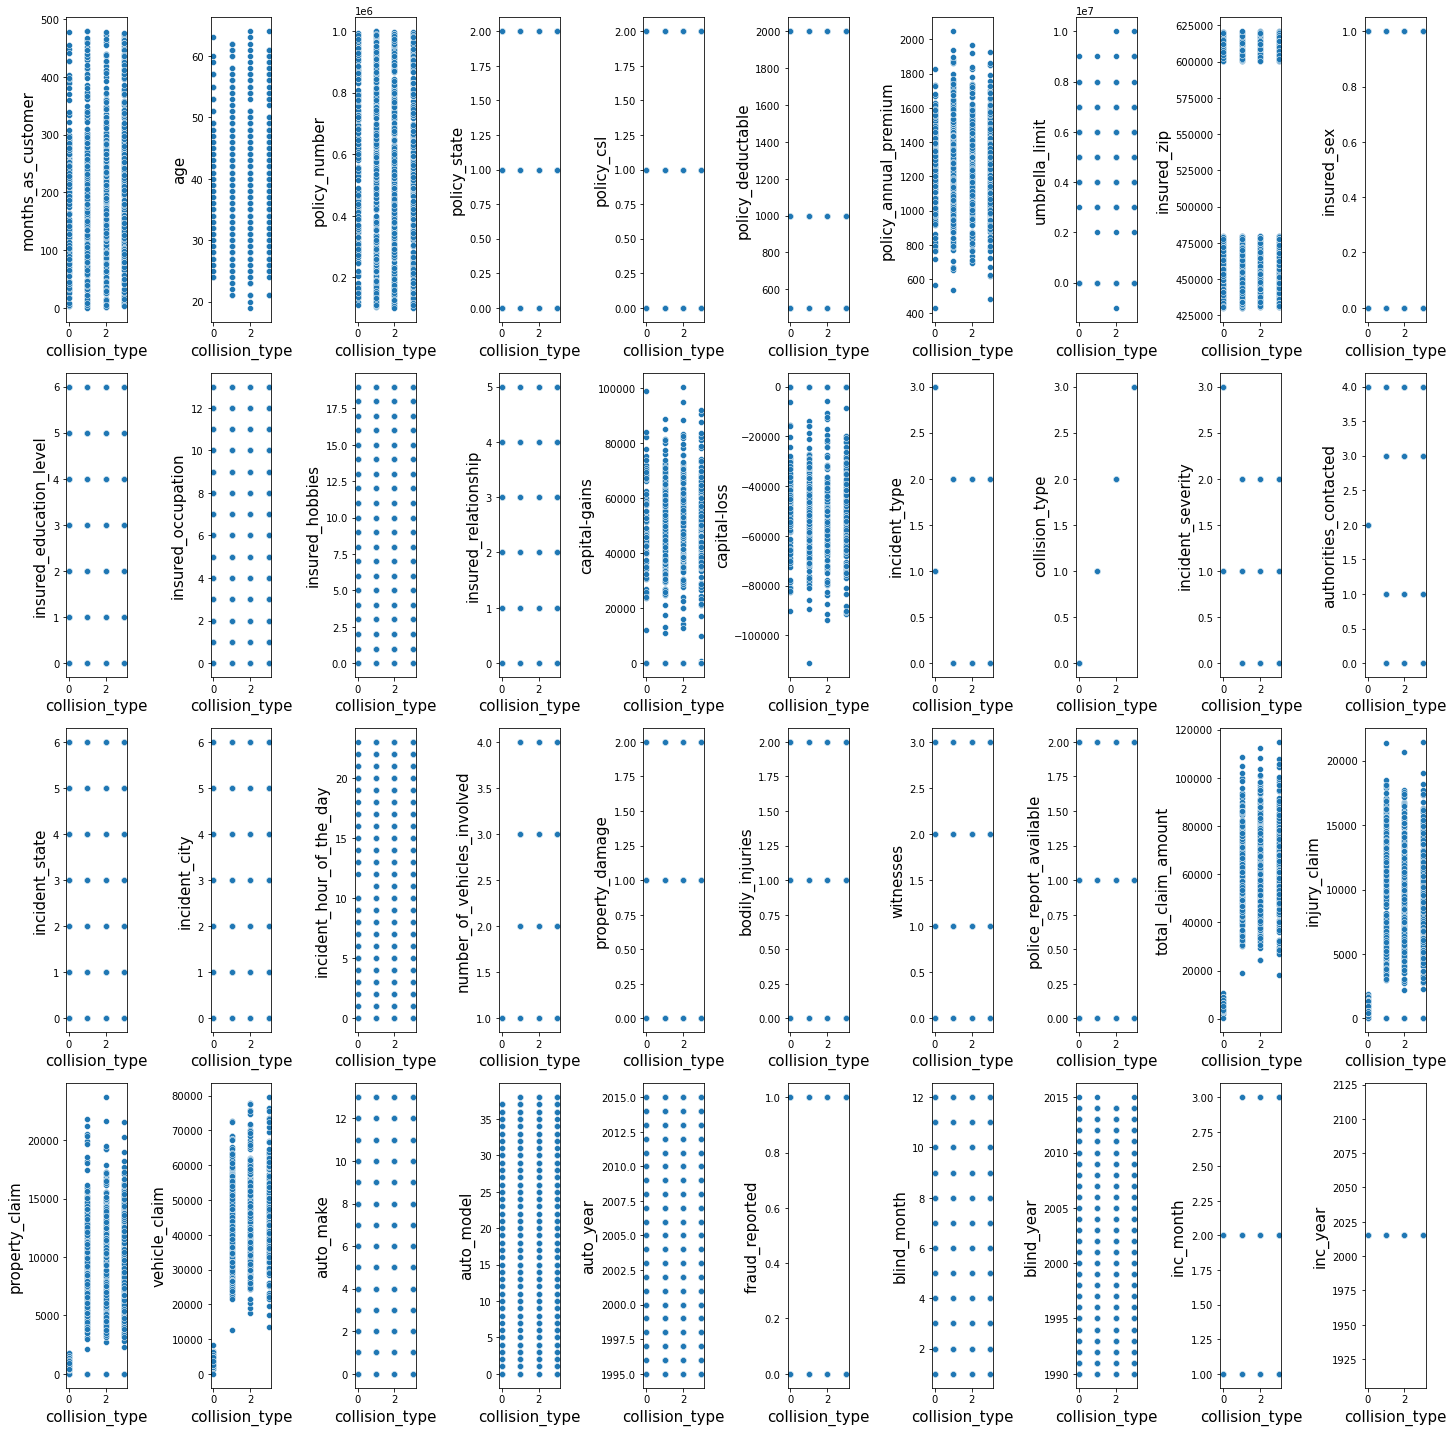

In [35]:
#Let see how the missing catagorical variable related to other columns
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=40:
        ax=plt.subplot(4,10,plotnumber)
        sns.scatterplot(y=df[column], x=df['collision_type'])
        plt.xlabel('collision_type',fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()  

#This collision_type' column seems to be depended on incident type, incident severity, authority contacted, total claimed amount, injury claim, property claim, injury claim
#The most correlated column is no. of vechines involved is always 1 in just collisionn type

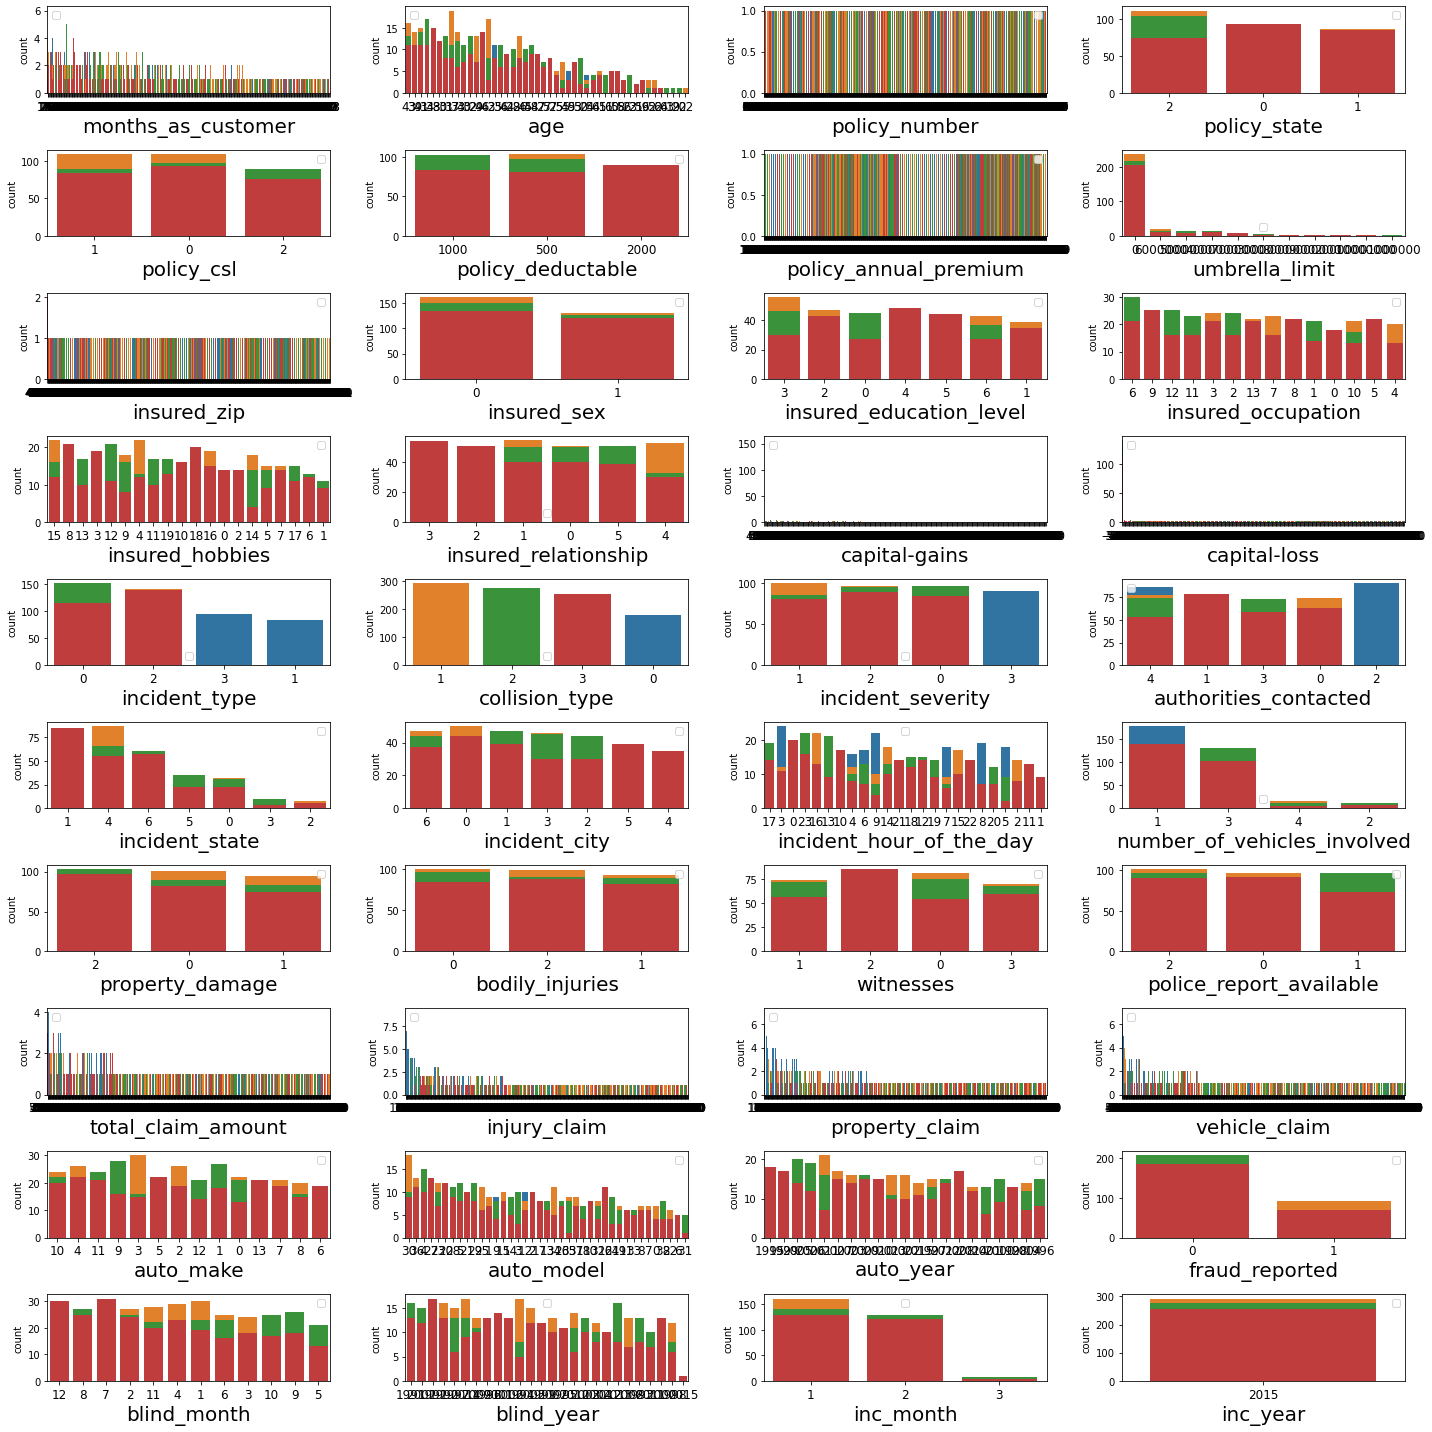

In [36]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        
        sns.countplot(x=df[column], data=df,order=df[column].value_counts().index,hue='collision_type',dodge=False)
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=12)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 
#This  Shows that we will not be able to use any other columns to fillNA, So I would just maintain the Nulls as a seperate catogory of Unknow.

In [37]:
x=df.drop(columns=['fraud_reported'],axis=1)
y=df['fraud_reported']

#Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)
#All are less than 5
#will drop injury_claim, property_claim , vehicle_claim

                        feature           VIF
0            months_as_customer  6.864626e+00
1                           age  6.864179e+00
2                 policy_number  1.030334e+00
3                  policy_state  1.039279e+00
4                    policy_csl  1.029872e+00
5             policy_deductable  1.036643e+00
6         policy_annual_premium  1.032628e+00
7                umbrella_limit  1.030536e+00
8                   insured_zip  1.038672e+00
9                   insured_sex  1.028311e+00
10      insured_education_level  1.046235e+00
11           insured_occupation  1.023259e+00
12              insured_hobbies  1.052699e+00
13         insured_relationship  1.044174e+00
14                capital-gains  1.044497e+00
15                 capital-loss  1.038897e+00
16                incident_type  5.161127e+00
17               collision_type  1.746660e+00
18            incident_severity  1.204079e+00
19        authorities_contacted  1.092243e+00
20               incident_state  1

In [39]:
#By doing VIF scores overthe data these coloumns are deleted as theer are multicorrelated to others in the table
df=df.drop(columns=['injury_claim'],axis=1)
df=df.drop(columns=['property_claim'],axis=1)
df=df.drop(columns=['vehicle_claim'],axis=1)
df=df.drop(columns=['months_as_customer'],axis=1)
df=df.drop(columns=['incident_type'],axis=1)
df=df.drop(columns=['inc_year'],axis=1)
df=df.drop(columns=['policy_annual_premium'],axis=1)
df=df.drop(columns=['insured_zip'],axis=1)
df=df.drop(columns=['auto_year'],axis=1)
df=df.drop(columns=['blind_year'],axis=1)
df=df.drop(columns=['inc_month'],axis=1)
df=df.drop(columns=['age'],axis=1)
df=df.drop(columns=['total_claim_amount'],axis=1)

KeyError: "['injury_claim'] not found in axis"

In [46]:
x=df.drop(columns=['fraud_reported'],axis=1)
y=df['fraud_reported']

#Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                        feature       VIF
0                 policy_number  5.258851
1                  policy_state  2.483352
2                    policy_csl  2.409995
3             policy_deductable  4.273662
4                umbrella_limit  1.254462
5                   insured_sex  1.848040
6       insured_education_level  3.253710
7            insured_occupation  3.533470
8               insured_hobbies  3.902184
9          insured_relationship  3.025431
10                capital-gains  1.871983
11                 capital-loss  1.962184
12               collision_type  3.899492
13            incident_severity  2.728441
14        authorities_contacted  3.075705
15               incident_state  3.252421
16                incident_city  3.029867
17     incident_hour_of_the_day  3.890749
18  number_of_vehicles_involved  4.420655
19              property_damage  2.438305
20              bodily_injuries  2.453832
21                    witnesses  2.789379
22      police_report_available  2

In [47]:
#As the Label is imbalance, Will balance it using SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE(0.8,k_neighbors=5)
x_smoted, y_smoted=oversample.fit_resample(x,y)
# summarize distribution
counter = y_smoted.value_counts()
for k,v in counter.items():
    per = v / len(y_smoted) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
#THE dataSET IS BALANCED NOW, 

Class=0, n=753 (55.572%)
Class=1, n=602 (44.428%)


In [48]:
#Scale the fetures
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_smoted)
x_scaled

array([[-0.07554173,  1.32607032,  0.17225725, ...,  0.95617   ,
        -1.7228251 ,  1.07556327],
       [-0.77621686,  0.07130406,  0.17225725, ...,  0.43406226,
        -0.68324338, -0.12789522],
       [ 0.57571834,  1.32607032, -1.1172929 , ..., -0.61015321,
         1.01789035,  0.77469865],
       ...,
       [ 1.54357738,  0.07130406,  0.17225725, ..., -0.61015321,
         1.11239778, -0.12789522],
       [ 0.67178442,  1.32607032, -1.1172929 , ...,  1.47827774,
         0.26183092, -0.42875984],
       [-0.09426253,  1.32607032, -1.1172929 , ..., -0.61015321,
         0.82887549,  1.07556327]])

In [49]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y_smoted,test_size=0.25, random_state=100)

In [50]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       198
           1       0.75      0.81      0.78       141

    accuracy                           0.81       339
   macro avg       0.80      0.81      0.80       339
weighted avg       0.81      0.81      0.81       339



In [56]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       150
           1       0.87      0.79      0.83       121

    accuracy                           0.86       271
   macro avg       0.86      0.85      0.85       271
weighted avg       0.86      0.86      0.86       271



In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.93      0.50      0.65       198
           1       0.57      0.94      0.71       141

    accuracy                           0.68       339
   macro avg       0.75      0.72      0.68       339
weighted avg       0.78      0.68      0.68       339



# Will Choose to go with random Forest Classifier

In [57]:
#Cross Validation
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f

from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    x_train , x_test = x_scaled[train_index,:],x_scaled[test_index,:]
    y_train , y_test = y_smoted[train_index] , y_smoted[test_index]
     
    RF.fit(x_train,y_train)
    pred_values = RF.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print(classification_report(y_test,pred_values,digits=2))

accuracy of each fold - [0.34983642311886587, 0.3202341137123744, 0.2597246503496501, 0.34007248839053106, 0.43067226890756294]
Avg accuracy : 0.34010798889579685
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       152
           1       0.82      0.87      0.85       119

    accuracy                           0.86       271
   macro avg       0.86      0.86      0.86       271
weighted avg       0.86      0.86      0.86       271



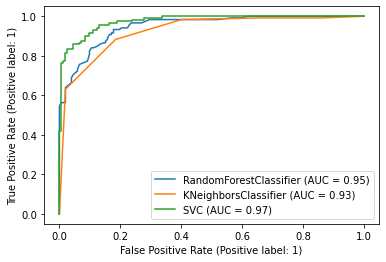

In [59]:
#ROC CURVE COMPARING WITH OTHER MODELS
from sklearn.metrics import plot_roc_curve

classifiers = [RF, knn,svc ]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax)

In [61]:
#This shows SVC is performing better; Lets Hypertune SVC

params={'C':[ 1, 3, 5, 7, 8,  12, 15, 18, 20],
   'gamma':[0.1, 0.4, 0.8, 1]}
GSCV=GridSearchCV(svc,params)
GSCV.fit(x_train,y_train)
GSCV.best_params_



{'C': 3, 'gamma': 0.1}

In [62]:
from sklearn.svm import SVC
svc=SVC(C=3, gamma=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       152
           1       0.88      0.83      0.85       119

    accuracy                           0.87       271
   macro avg       0.87      0.87      0.87       271
weighted avg       0.87      0.87      0.87       271



In [63]:
with open("svc", "wb") as f:
    pickle.dump(svc, f)

In [64]:
with open("RF", "wb") as f:
    pickle.dump(RF, f)